In [19]:
import torch
from torch import nn # nn contains all of PyTorch's building blocks for neural networks
import matplotlib.pyplot as plt

# Check PyTorch version
torch.__version__

'2.5.1+cu124'

In [20]:
# Creating the known parameters
weight = 0.7
bias = 0.3

# Creating data
start = 0
end = 1
step = 0.02

X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*X+bias
y[:10], X[:10]

(tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]),
 tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]))

In [21]:
train_split = int(0.8*len(X))

X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

In [22]:
def plot_prediction(train_data=X_train, train_label=y_train, test_data=X_test, test_label=y_test, predictions=None):
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_label, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_label, c='g', s=4, label="Testing data")

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    plt.legend(prop={"size":14})

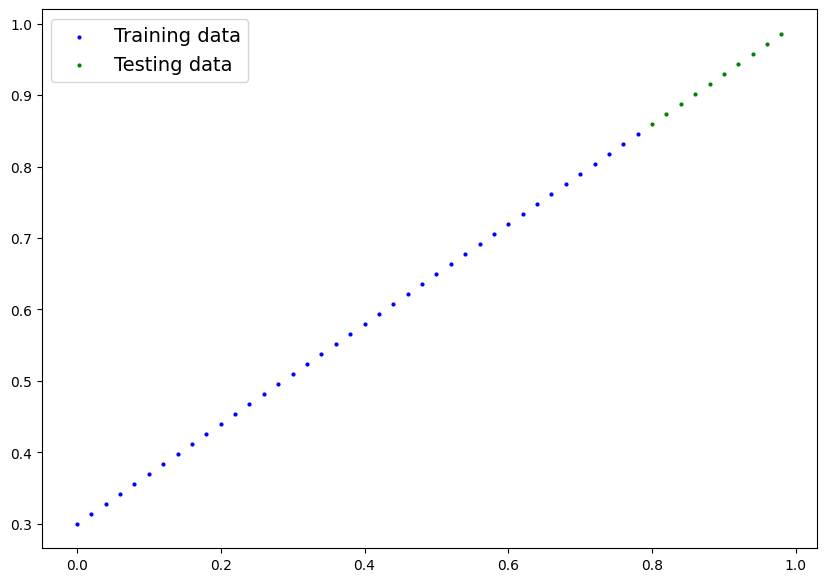

In [23]:
plot_prediction()

In [24]:
class Linear_Regression_Model(nn.Module):

    def __init__(self):
        super().__init__()

        self.weights = nn.Parameter(torch.rand(1, dtype=torch.float), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float), requires_grad=True)

    def forward(self, x:torch.Tensor) -> torch.Tensor:
        return self.weights*x+self.bias

In [25]:
torch.manual_seed(42)

model_0 = Linear_Regression_Model()

list(model_0.parameters())

[Parameter containing:
 tensor([0.8823], requires_grad=True),
 Parameter containing:
 tensor([-0.6382], requires_grad=True)]

In [26]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.8823])), ('bias', tensor([-0.6382]))])

In [27]:
with torch.inference_mode():
    y_preds = model_0(X_test)

In [28]:
print(f"Predicted values:\n{y_preds}")

Predicted values:
tensor([[0.0677],
        [0.0853],
        [0.1030],
        [0.1206],
        [0.1382],
        [0.1559],
        [0.1735],
        [0.1912],
        [0.2088],
        [0.2265]])


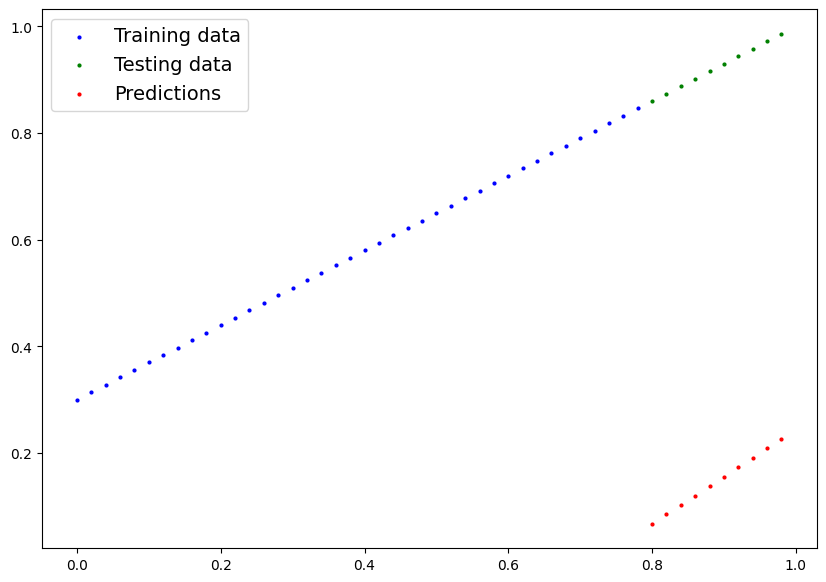

In [29]:
plot_prediction(predictions=y_preds)

In [30]:
y_test-y_preds

tensor([[0.7923],
        [0.7887],
        [0.7850],
        [0.7814],
        [0.7778],
        [0.7741],
        [0.7705],
        [0.7668],
        [0.7632],
        [0.7595]])

In [31]:
loss_func = nn.L1Loss()

optimizer = torch.optim.SGD(params = model_0.parameters(), lr=0.01)

In [32]:
torch.manual_seed(42)

epochs = 1000

train_loss_values = []
test_loss_values = []
epoch_count = []

for epoch in range(epochs):
    #Training

    model_0.train()

    y_pred = model_0(X_train)
    
    loss = loss_func(y_pred, y_train)
    
    optimizer.zero_grad()

    loss.backward()

    optimizer.step()

    #Testing

    model_0.eval()

    with torch.inference_mode():
        test_pred = model_0(X_test)

        test_loss = loss_func(test_pred, y_test.type(torch.float))

    if epoch%10==0:
        epoch_count.append(epoch)
        train_loss_values.append(loss.detach().numpy())
        test_loss_values.append(test_loss.detach().numpy())
        print(f"Epoch: {epoch}| MAE Train loss: {loss}| MAE Test loss: {test_loss}")

Epoch: 0| MAE Train loss: 0.8670692443847656| MAE Test loss: 0.7624635696411133
Epoch: 10| MAE Train loss: 0.7518593072891235| MAE Test loss: 0.6277537941932678
Epoch: 20| MAE Train loss: 0.636649489402771| MAE Test loss: 0.4930438995361328
Epoch: 30| MAE Train loss: 0.5214395523071289| MAE Test loss: 0.3583340346813202
Epoch: 40| MAE Train loss: 0.4062294363975525| MAE Test loss: 0.2236236333847046
Epoch: 50| MAE Train loss: 0.2910192012786865| MAE Test loss: 0.08891315013170242
Epoch: 60| MAE Train loss: 0.17580902576446533| MAE Test loss: 0.04579734057188034
Epoch: 70| MAE Train loss: 0.11110417544841766| MAE Test loss: 0.13382463157176971
Epoch: 80| MAE Train loss: 0.09491372108459473| MAE Test loss: 0.16986632347106934
Epoch: 90| MAE Train loss: 0.08829215168952942| MAE Test loss: 0.18401066958904266
Epoch: 100| MAE Train loss: 0.08408287912607193| MAE Test loss: 0.18612226843833923
Epoch: 110| MAE Train loss: 0.08055473864078522| MAE Test loss: 0.18197114765644073
Epoch: 120| MAE

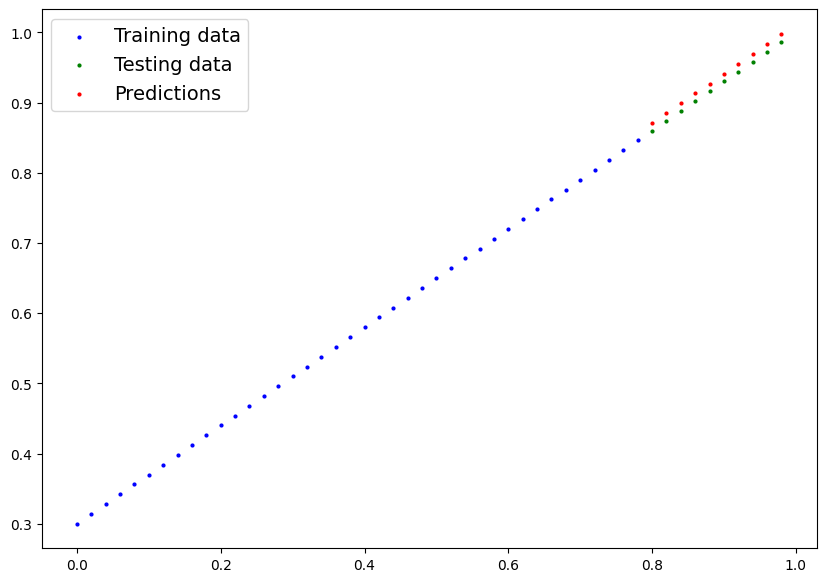

In [33]:
plot_prediction(predictions=test_pred.detach())

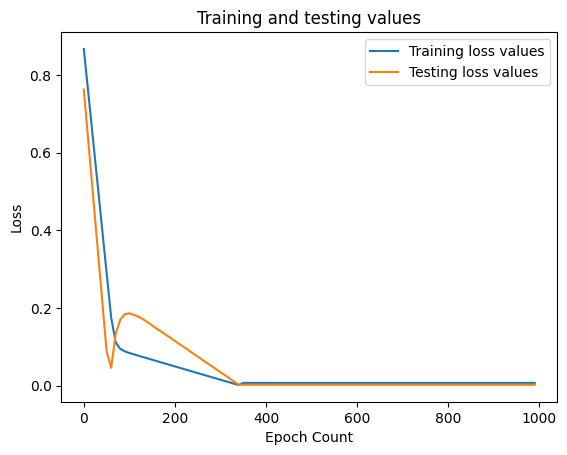

In [34]:
plt.plot(epoch_count, train_loss_values, label="Training loss values")
plt.plot(epoch_count, test_loss_values, label="Testing loss values")
plt.title("Training and testing values")
plt.xlabel("Epoch Count")
plt.ylabel("Loss")
plt.legend()

In [35]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.7083])), ('bias', tensor([0.3038]))])

In [36]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "lin_reg_model0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"Saving model to {MODEL_SAVE_PATH}")
torch.save(model_0.state_dict(), MODEL_SAVE_PATH)

Saving model to models/lin_reg_model0.pth


AttributeError: '_pickle.Pickler' object attribute 'persistent_id' is read-only

In [ ]:
model_0._save_to_state_dict(MODEL_SAVE_PATH)

TypeError: Module._save_to_state_dict() missing 2 required positional arguments: 'prefix' and 'keep_vars'

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
# Define model
class TheModelClass(nn.Module):
    def __init__(self):
        super(TheModelClass, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# Initialize model
model = TheModelClass()

# Initialize optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

# Print model's state_dict
print("Model's state_dict:")
for param_tensor in model.state_dict():
    print(param_tensor, "\t", model.state_dict()[param_tensor].size())

# Print optimizer's state_dict
print("Optimizer's state_dict:")
for var_name in optimizer.state_dict():
    print(var_name, "\t", optimizer.state_dict()[var_name])

Model's state_dict:
conv1.weight 	 torch.Size([6, 3, 5, 5])
conv1.bias 	 torch.Size([6])
conv2.weight 	 torch.Size([16, 6, 5, 5])
conv2.bias 	 torch.Size([16])
fc1.weight 	 torch.Size([120, 400])
fc1.bias 	 torch.Size([120])
fc2.weight 	 torch.Size([84, 120])
fc2.bias 	 torch.Size([84])
fc3.weight 	 torch.Size([10, 84])
fc3.bias 	 torch.Size([10])
Optimizer's state_dict:
state 	 {}
param_groups 	 [{'lr': 0.001, 'momentum': 0.9, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]}]


In [ ]:
torch.save(model.state_dict(), f="a.pth")

AttributeError: '_pickle.Pickler' object attribute 'persistent_id' is read-only

In [ ]:
#Xavier Initialisation
import math
weight = torch.rand(784,10)/math.sqrt(784)
# Should be used when tanh or log sigmoid activation functions are used should be avoided with relu

tensor([[0.0003, 0.0195, 0.0164,  ..., 0.0017, 0.0258, 0.0158],
        [0.0045, 0.0104, 0.0082,  ..., 0.0255, 0.0314, 0.0269],
        [0.0348, 0.0144, 0.0183,  ..., 0.0100, 0.0112, 0.0297],
        ...,
        [0.0117, 0.0244, 0.0135,  ..., 0.0069, 0.0158, 0.0104],
        [0.0082, 0.0209, 0.0149,  ..., 0.0104, 0.0056, 0.0343],
        [0.0345, 0.0264, 0.0175,  ..., 0.0053, 0.0085, 0.0099]])